In [1]:
#사용할 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import json
%matplotlib inline
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


# 서울시 행정구역별 학원수 분석

In [2]:
#지도를 그리기 위한 베이스 구성
geo_json='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [3]:
#서울시 학원교습소 데이터
seoul_Academy_raw = pd.read_csv('data/Seoul_Academy.csv', thousands=',', encoding='euc-kr')

seoul_Academy_raw.head()

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,동대문구,학원,1000000043,도우리이용기술학원,서울특별시 동대문구 왕산로33길 32,/ 2층 (제기동),직업기술,산업응용기술,이?미용/,이?미용,...,NaN,Y,N,130862.0,개원,19670209,NaN,NaN,19670209,20210516061405
1,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,/ 5층2호?5층6호?5층7호 중 일부(B호) (청량리동/ 미주상가),종합(대),NaN,전산회계/컴퓨터(정보처리/통신기기/인터넷/소프트웨어)/,NaN,...,NaN,Y,N,2490.0,개원,19681227,NaN,NaN,19681227,20210516061405
2,동대문구,학원,1000000083,국제전자과학학원,서울특별시동대문구 고산자로36길3,3층일부(제기동),직업기술,산업기반기술,전자/,전자,...,NaN,Y,N,130865.0,개원,19680210,NaN,NaN,19680210,20210516061405
3,동대문구,학원,1000000147,조이앤플레이음악학원,서울특별시 동대문구 이문로 38,/ 3층 301호 (휘경동/ 민족통일빌딩),예능(대),예능(중),음악/,음악,...,NaN,Y,N,2445.0,개원,19720630,NaN,NaN,19720630,20210516061405
4,동대문구,학원,1000000151,한독자동차정비학원,서울특별시 동대문구 왕산로 31,/ 2층/3층 (신설동),직업기술,산업기반기술,자동차/,자동차,...,NaN,Y,N,130811.0,개원,19720501,NaN,NaN,19720501,20210516061405


In [4]:
#구별 학원수 추출을 위해 필요한 열만 남기고 삭제
seoul_Academy = seoul_Academy_raw.loc[:, ['행정구역명','학원명', '분야명', '개설일자']]
seoul_Academy.dropna(inplace=True)
seoul_Academy.head()

,행정구역명,학원명,분야명,개설일자
0,동대문구,도우리이용기술학원,직업기술,19670209
1,동대문구,대성회계실무학원,종합(대),19681227
2,동대문구,국제전자과학학원,직업기술,19680210
3,동대문구,조이앤플레이음악학원,예능(대),19720630
4,동대문구,한독자동차정비학원,직업기술,19720501


In [5]:
#입시 및 보습 학원의 갯수만 추출하기 위해 다른 분야의 행 삭제
seoul_Academy = seoul_Academy[seoul_Academy.분야명 == '입시.검정 및 보습']
seoul_Academy.head()

,행정구역명,학원명,분야명,개설일자
5,중랑구,예맥보습학원,입시.검정 및 보습,19881102
6,중랑구,세진보습학원,입시.검정 및 보습,19880719
8,동대문구,장안로드맵수학학원,입시.검정 및 보습,19891209
9,동대문구,더하이스트수학학원,입시.검정 및 보습,19890619
10,동대문구,미래사관학원,입시.검정 및 보습,19890522


In [6]:
#행정구역별 학원수 통계
seoul_Academy_gu = seoul_Academy['행정구역명'].value_counts().to_frame('학원통계')
seoul_Academy_gu.head()

,학원통계
강남구,1797
양천구,1398
송파구,967
서초구,929
노원구,860


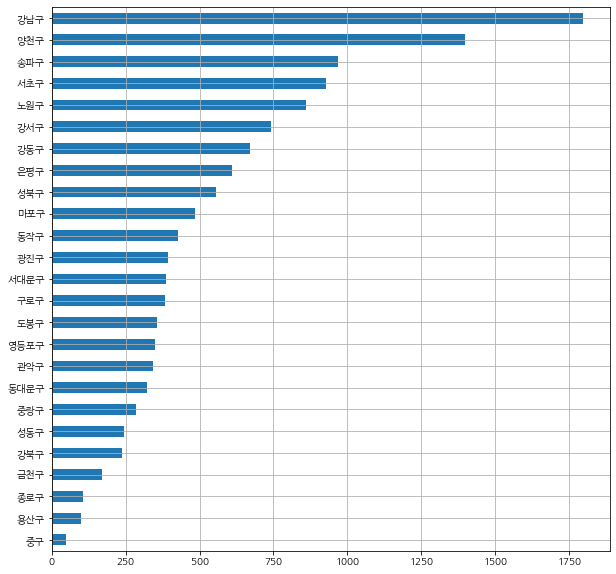

In [7]:
#행정구역별 학원수 막대 그래프
seoul_Academy_gu['학원통계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

서울시의 행정구역별로 학원수를 막대 그래프로 보여준다.
강남구, 양천구, 송파구순으로 학원이 가장 많고 중구, 용산구, 중구 순으로 학원이 적게 나왔다.
이를 한 눈에 보기 편하게 지도를 이용하여 시각화해보자.

In [8]:
#지도를 이용하여 구별 학원 수 시각화
final_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

final_map.choropleth(geo_data = geo_json,
               data = seoul_Academy_gu['학원통계'],  
               columns = [seoul_Academy_gu.index, seoul_Academy_gu['학원통계']],
               fill_color = 'PuRd',
                    key_on='feature.properties.name')
final_map

/home/server2/anaconda3/envs/practice/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


지도로 본다면 한강 기준으로 아랫쪽 행정구역에 학원이 밀집되어 있는 것을 알 수 있다.
하지만 그저 학원수만으로는 어느 지역이 사교육열이 강한지는 알 수 없다.
그렇기에 각 지역의 학생수와 학원수의 상관관계를 분석하고 시각화해보자.

# 학생수에 따른 행정구역별 학원수 분석

In [9]:
#학생 통계에 비교해서 학원수를 비교하기 위해 구 별 학생수 데이터 호출
seoul_Student_raw = pd.read_csv('data/Seoul_Student.csv', thousands=',', encoding='euc-kr')
seoul_Student_raw.head()

,기간,행정구역명,학교수,학생수,학교 1개당 평균학생수,학교수.1,학생수.1,학교 1개당 평균학생수.1,학교수.2,학생수.2,학교 1개당 평균학생수.2
0,2020,종로구,13,5192,399,9,2793,310,14,8467,605
1,2020,중구,12,4990,416,8,1845,231,11,6731,612
2,2020,용산구,15,6870,458,9,3512,390,10,5470,547
3,2020,성동구,21,10992,523,11,4861,442,9,4594,510
4,2020,광진구,22,14257,648,12,7337,611,9,7378,820


In [10]:
#필요없는 데이터를 제거
seoul_Student = seoul_Student_raw.loc[:, ['행정구역명','학생수','학생수.1', '학생수.2']]
seoul_Student.dropna(inplace=True)
seoul_Student.head()

,행정구역명,학생수,학생수.1,학생수.2
0,종로구,5192,2793,8467
1,중구,4990,1845,6731
2,용산구,6870,3512,5470
3,성동구,10992,4861,4594
4,광진구,14257,7337,7378


In [11]:
#초중고 학생수를 합한 다음 조인을 위해 데이터 다듬기
seoul_Student['학생통계'] = seoul_Student.apply(lambda row: sum([row['학생수'], row['학생수.1'], row['학생수.2']]), axis=1)
seoul_Student_gu = seoul_Student.loc[:, ['행정구역명', '학생통계']]
seoul_Student.dropna(inplace=True)
seoul_Student_gu.head()

,행정구역명,학생통계
0,종로구,16452
1,중구,13566
2,용산구,15852
3,성동구,20447
4,광진구,28972


In [12]:
#데이터 조인을 위해 구 통계에서 인덱스를 추출하여 행정구역명으로 변경
seoul_Academy_gu = seoul_Academy_gu.rename_axis('행정구역명').reset_index()
seoul_Academy_gu.head()

,행정구역명,학원통계
0,강남구,1797
1,양천구,1398
2,송파구,967
3,서초구,929
4,노원구,860


In [13]:
#힉생 합계와 학원 통계 조인
seoul_AS=pd.merge(left = seoul_Academy_gu , right = seoul_Student_gu, how = "inner", on = "행정구역명").set_index('행정구역명')
seoul_AS.head()

,학원통계,학생통계
행정구역명,,
강남구,1797,59344
양천구,1398,52115
송파구,967,62219
서초구,929,43580
노원구,860,61078


In [14]:
#numpy를 이용한 상관관계 분석
np.corrcoef(seoul_AS['학생통계'], seoul_AS['학원통계'])

array([[1.        , 0.87343931],
       [0.87343931, 1.        ]])

상관계수가 0.87343931라는 것은 학생통계와 학원통계 사이에 강한 양의 관계를 갖는 것을 의미한다.
즉, 학생 수가 많을 수록 학원 수도 많다라는 것을 나타내는 것이다.

In [15]:
#추세선을 그리고 그 선과 데이터 간의 차이를 오차라고 표현
fp = np.polyfit(seoul_AS['학생통계'], seoul_AS['학원통계'], 1)
f = np.poly1d(fp)
fx = np.linspace(10000, 70000, 100)

seoul_AS['오차'] = np.abs(seoul_AS['학원통계'] - f(seoul_AS['학생통계']))
seoul_AS_sort = seoul_AS.sort_values(by='오차', ascending=False)
seoul_AS_sort.head()

,학원통계,학생통계,오차
행정구역명,,,
강남구,1797,59344,642.537466
양천구,1398,52115,420.121785
노원구,860,61078,336.819320
송파구,967,62219,257.690770
강서구,741,51758,228.157700


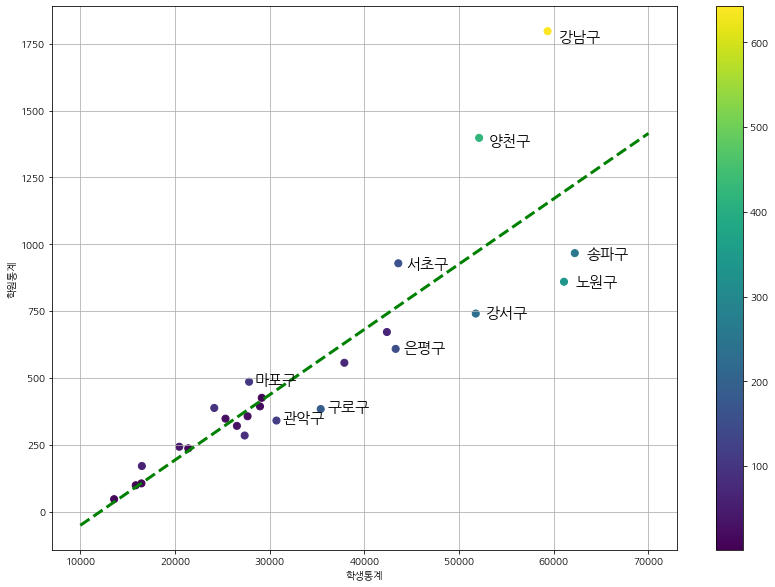

In [16]:
#scatter를 이용해 학생 수와 학원 수의 관계를 시각화하고 추세선에 대해 멀어지는 데이터의 이름을 표현해서 시각화
plt.figure(figsize=(14, 10))
plt.scatter(seoul_AS['학생통계'], seoul_AS['학원통계'], c=seoul_AS['오차'], s=50)
plt.plot(fx, f(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(seoul_AS_sort['학생통계'][n]*1.02, seoul_AS_sort['학원통계'][n]*0.98, seoul_AS_sort.index[n], fontsize=15)
    
plt.xlabel('학생통계')
plt.ylabel('학원통계')

plt.colorbar()
plt.grid()
plt.show()

위 그래프를 보면 추세선 위 쪽에 있는 구들은 학생 통계에 비해 학원이 많다라는 것으로 볼 수 있고, 아래에 있는 구 들은 학생 통계에 비해 학원이 적다고 볼 수 있다.
강남구, 양천구, 서초구가 서울시 평균보다 학생수 대비 학원이 많이 있는 지역이고, 송파구 노원구 강서구가 학생수 대비 학원이 적은 지역인 것을 알 수 있다.

In [17]:
#지도로 표현하기 위해 학생당비율 열을 생성
seoul_AS['학생당비율'] = seoul_AS['학원통계'] / seoul_AS['학생통계'] * 100
seoul_AS.head()

,학원통계,학생통계,오차,학생당비율
행정구역명,,,,
강남구,1797,59344,642.537466,3.028107
양천구,1398,52115,420.121785,2.682529
송파구,967,62219,257.690770,1.554188
서초구,929,43580,159.608043,2.131712
노원구,860,61078,336.819320,1.408036


In [18]:
#지도를 이용하여 학생당비율 수 시각화
final_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

final_map.choropleth(geo_data = geo_json,
               data = seoul_AS['학생당비율'],  
               columns = [seoul_AS.index, seoul_AS['학생당비율']],
               fill_color = 'PuRd',
                    key_on='feature.properties.name')
final_map

/home/server2/anaconda3/envs/practice/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


위에서 만들었던 학원수 지도와 크게 다르지 않지만 마포구는 학원수는 적을 수 있지만, 학생수 대비 학원이 많은 곳이고, 송파구는 학원수는 많지만 학생수 대비 학원이 적은 곳이었다는 것을 볼 수 있다.

# 소득수준과 학생 대비 학원 수 관계 분석

In [19]:
#소득수준과 학원의 학생당 비율의 상관관계를 조사
seoul_Income = pd.read_csv('data/Seoul_Income.csv', thousands=',', encoding='euc-kr')
seoul_Income.head()

,행정구역명,신고인원,총수입금액
0,강남구,126186,35062652
1,강동구,75108,9564637
2,강북구,48514,4902456
3,강서구,96666,11631215
4,관악구,88286,8319351


In [20]:
#행정구역별 총수입금액을 신고인원으로 나눠서 1인당 수입금액을 생성
seoul_Income['1인당수입금액']=seoul_Income['총수입금액']/seoul_Income['신고인원'] #세금계산전
seoul_Income = seoul_Income.loc[:, ['행정구역명', '1인당수입금액']]
seoul_Income.head()

,행정구역명,1인당수입금액
0,강남구,277.864834
1,강동구,127.345116
2,강북구,101.052397
3,강서구,120.323744
4,관악구,94.231826


In [21]:
#앞 서 만든 학원학생통계 df와 조인해서 학원,학생, 소득df를 생성
seoul_ASI=pd.merge(left = seoul_AS , right = seoul_Income, how = "inner", on = "행정구역명").set_index('행정구역명')
seoul_ASI.head()

,학원통계,학생통계,오차,학생당비율,1인당수입금액
행정구역명,,,,,
강남구,1797,59344,642.537466,3.028107,277.864834
양천구,1398,52115,420.121785,2.682529,165.514221
송파구,967,62219,257.690770,1.554188,168.764371
서초구,929,43580,159.608043,2.131712,252.786376
노원구,860,61078,336.819320,1.408036,118.093836


In [22]:
#numpy를 이용한 상관관계 분석
np.corrcoef(seoul_ASI['학생당비율'], seoul_ASI['1인당수입금액'])

array([[1.        , 0.34168199],
       [0.34168199, 1.        ]])

보통의 양의 관계를 가지고 있다.

In [23]:
#추세선과 오차 생성
fp = np.polyfit(seoul_ASI['1인당수입금액'], seoul_ASI['학생당비율'], 1)
f = np.poly1d(fp)
fx = np.linspace(100, 400, 100)

seoul_ASI['오차'] = np.abs(seoul_ASI['1인당수입금액'] - f(seoul_ASI['학생당비율']))
seoul_ASI_sort = seoul_ASI.sort_values(by='오차', ascending=False)
seoul_ASI_sort.head()

,학원통계,학생통계,오차,학생당비율,1인당수입금액
행정구역명,,,,,
강남구,1797,59344,277.052787,3.028107,277.864834
서초구,929,43580,251.977952,2.131712,252.786376
용산구,99,15852,245.384059,0.624527,246.186390
종로구,106,16452,186.022471,0.644299,186.824882
중구,47,13566,180.488044,0.346454,181.289251


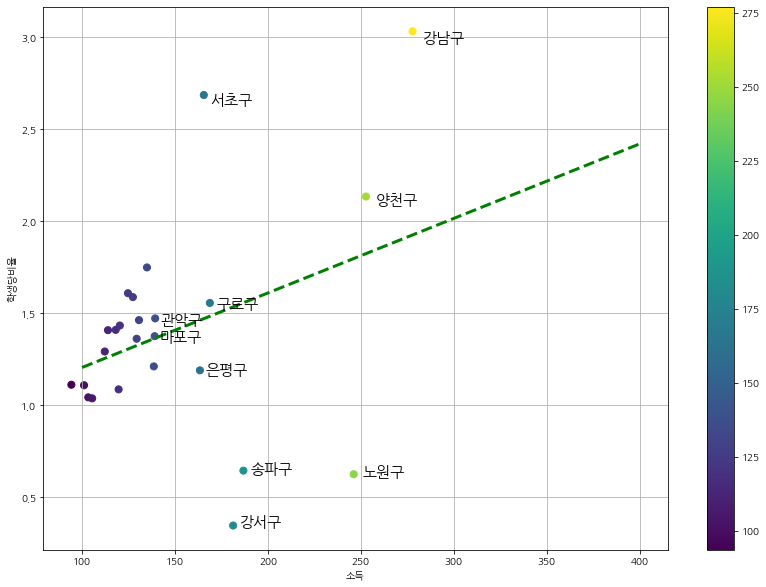

In [24]:
#scatter와 추세선 그리기
plt.figure(figsize=(14, 10))
plt.scatter(seoul_ASI['1인당수입금액'], seoul_ASI['학생당비율'], c=seoul_ASI['오차'], s=50)
plt.plot(fx, f(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(seoul_ASI_sort['1인당수입금액'][n]*1.02, seoul_ASI_sort['학생당비율'][n]*0.98, seoul_AS_sort.index[n], fontsize=15)
    
plt.xlabel('소득')
plt.ylabel('학생당비율')

plt.colorbar()
plt.grid()
plt.show()

소득 수준, 학생수, 학원수는 관계는 있으나 강한 관계는 아니라서 성공적인 분석이라고 할 수는 없다.
조금 더 세밀한 데이터셋이 있었다면 조금 더 좋은 분석이 나오지 않을까 싶다.

# 학원 개설일자를 이용하여 학원수 시계열 분석 및 예측

In [25]:
#개설일자를 기준으로 시계열 분석
seoul_Academy_open = seoul_Academy['개설일자'].value_counts().to_frame('학원수')
seoul_Academy_open = seoul_Academy_open.rename_axis('날짜').reset_index()
seoul_Academy_open.head()

,날짜,학원수
0,20191220,14
1,20191204,14
2,20160226,13
3,20161122,12
4,20200309,12


In [29]:
#날짜를 pandas에서 지원하는 datetype으로 변경하고 2000년부터 지금까지의 데이터만 추출
seoul_Academy_open['날짜']=pd.to_datetime(seoul_Academy_open['날짜'], format="%Y%m%d")
seoul_Academy_open = seoul_Academy_open[seoul_Academy_open['날짜'].notnull()]
seoul_Academy_open = seoul_Academy_open[seoul_Academy_open['학원수'].notnull()]
seoul_Academy_open['날짜']=seoul_Academy_open.query('"2000-01-01"<= 날짜 <= "2021-06-01"')
seoul_Academy_open.head()

,날짜,학원수
0,2019-12-20 00:00:00,14
1,2019-12-04 00:00:00,14
2,2016-02-26 00:00:00,13
3,2016-11-22 00:00:00,12
4,2020-03-09 00:00:00,12


<AxesSubplot:xlabel='날짜'>

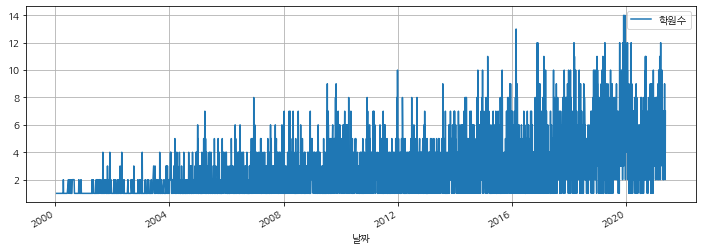

In [27]:
#선그래프를 이용하여 시간별로 학원수를 표현
seoul_Academy_open.plot(x='날짜', y='학원수',figsize=(12,4), grid=True)

2000년부터 꾸준하게 학원 수는 증가하고 있다.
이 그래프를 바탕으로 앞으로 학원의 수는 어떻게 증가할까 예측해보자.

In [30]:
#Prophet을 이용하여 예측모델 구성
df = pd.DataFrame({'ds':seoul_Academy_open['날짜'], 'y':seoul_Academy_open['학원수']})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [31]:
#360일 약 1년동안 어떻게 변화할지 예측
future = m.make_future_dataframe(periods=360)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4533,2022-05-12,5.129049,2.901389,7.435906
4534,2022-05-13,5.229597,3.038510,7.297929
4535,2022-05-14,4.451203,2.081780,6.593187
4536,2022-05-15,2.486294,0.210937,4.855555
4537,2022-05-16,5.491919,3.301339,7.655047


forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/home/server2/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/server2/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


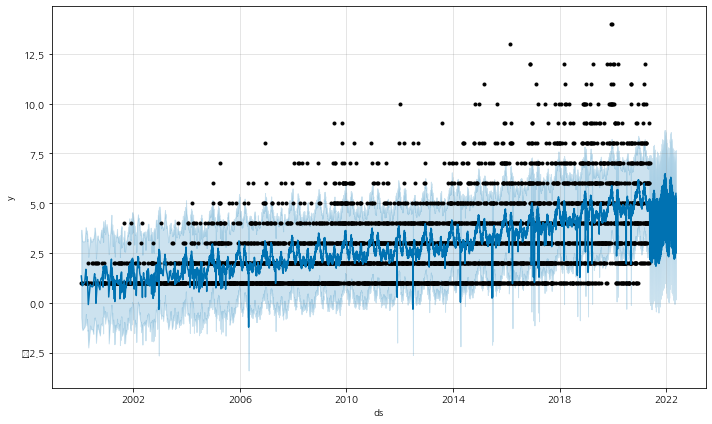

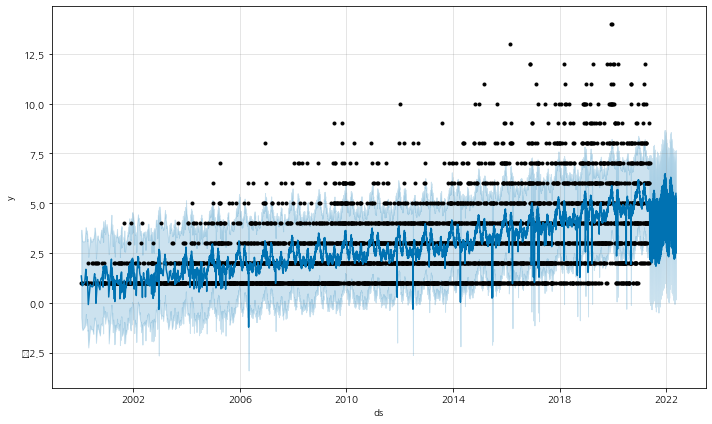

In [32]:
m.plot(forecast)

그래프의 모양을 살펴보면 매년 학원 개설은 연말에 증가했다가 감소하고 다시 증가하기를 반복한다.
평소와 같이 학원수는 계속 증가한다고 예측되고 있다.
사실 예측을 위해서는 개업보다 폐업데이터가 조금 더 재밌는 결과가 나오지 않았을까 싶다.
왜냐하면 개업보다 폐업이 사회경제의 영향을 많이 받기 때문이다.
이를 바탕으로 교육부가 전부터 사교육을 줄이려고 노력하고 있지만 생각보단 싶지 않았다는 것을 알 수 있다.